In [1]:
import pandas as pd

In [2]:
import pickle

In [3]:
import numpy as np
np.random.seed(2018)

In [4]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [96]:
url='https://drive.google.com/file/d/1XY8kQd7kEivHHmU3jdZAZD8s0Anb8XsP/view'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
trainingDf = pd.read_csv(url)
trainingDf.head()

,score,text,combine
0,3.0,"['good', 'helpfull', 'read', 'book', 'good', '...",good helpfull read book good type thats find d...
1,1.0,"['sadly', 'overprice', 'irrelevant', 'spite', ...",sadly overprice irrelevant spite claim illustr...
2,2.0,"['endless', 'rant', 'howard', 'borrow', 'denni...",endless rant howard borrow dennis miller start...
3,1.0,"['not', 'quite', 'hip', 'really', 'shame', 'ti...",not quite hip really shame time reserch go thi...
4,5.0,"['journey', 'centre', 'earth', 'hey', 'great',...",journey centre earth hey great book absolutely...


In [6]:
import gensim
from gensim import corpora
from pprint import pprint

In [91]:
def myprocess(thisdoc):
    ## Runs on documents (vector of words)
    return([text for text in thisdoc.split()])

In [97]:
docs=trainingDf['combine'].map(myprocess) 
docs[:10]

0    [good, helpfull, read, book, good, type, thats...
1    [sadly, overprice, irrelevant, spite, claim, i...
2    [endless, rant, howard, borrow, dennis, miller...
3    [not, quite, hip, really, shame, time, reserch...
4    [journey, centre, earth, hey, great, book, abs...
5    [long, land, free, repetitive, silly, prose, n...
6    [demon, viewamelia, atwaterrhodes, young, writ...
7    [heartbreakingbut, live, novel, compassionate,...
8    [wait, this, get, book, first, come, finally, ...
9    [awesome, book, absolutely, beautiful, daughte...
Name: combine, dtype: object

In [10]:
from gensim.models import Phrases

In [99]:
docsBi = trainingDf['combine'].map(myprocess) 

In [288]:
bigram_phrases = Phrases(docsBi, min_count=3, threshold=50)

In [289]:
#This code creates a function which replaces the two separate tokens with one bigram if it is in the bigram_phrases corpus
bigram_replace = gensim.models.phrases.Phraser(bigram_phrases)

def make_bigrams(text):
    return(bigram_replace[doc] for doc in text)

In [290]:
docsBiReplace = list(make_bigrams(docs))

In [100]:
# https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html

# Add bigrams to docsBi (only ones that appear 3 times or more).


for idx in range(len(docsBi)):
    for token in bigram[docsBi[idx]]:
        if '_' in token:
            docsBi[idx].append(token)
            
                            

In [101]:
docs[2]

['endless',
 'rant',
 'howard',
 'borrow',
 'dennis',
 'miller',
 'start',
 'book',
 'quoti',
 'not',
 'mean',
 'rant',
 'here',
 'butquot',
 'proceed',
 'page',
 'endless',
 'whine',
 'horrible',
 'law',
 'americathe',
 'example',
 'give',
 'about',
 'law',
 'suffocating',
 'america',
 'sometimes',
 'right',
 'mark',
 'time',
 'not',
 'well',
 'define',
 'less',
 'would',
 'more',
 'idea',
 'fix',
 'dilemma',
 'also',
 'goodif',
 'live',
 'perfect',
 'world',
 'unfortunately',
 'not',
 'practical',
 'solution',
 'message',
 'lose',
 'amongst',
 'myriad',
 'word',
 'woud',
 'not',
 'recommend',
 'book',
 'anyone',
 'ted',
 'kazinski']

In [102]:
docsBi[2]

['endless',
 'rant',
 'howard',
 'borrow',
 'dennis',
 'miller',
 'start',
 'book',
 'quoti',
 'not',
 'mean',
 'rant',
 'here',
 'butquot',
 'proceed',
 'page',
 'endless',
 'whine',
 'horrible',
 'law',
 'americathe',
 'example',
 'give',
 'about',
 'law',
 'suffocating',
 'america',
 'sometimes',
 'right',
 'mark',
 'time',
 'not',
 'well',
 'define',
 'less',
 'would',
 'more',
 'idea',
 'fix',
 'dilemma',
 'also',
 'goodif',
 'live',
 'perfect',
 'world',
 'unfortunately',
 'not',
 'practical',
 'solution',
 'message',
 'lose',
 'amongst',
 'myriad',
 'word',
 'woud',
 'not',
 'recommend',
 'book',
 'anyone',
 'ted',
 'kazinski',
 'dennis_miller',
 'practical_solution']

In [291]:
docsBiReplace[2]

['endless',
 'rant',
 'howard',
 'borrow',
 'dennis_miller',
 'start',
 'book',
 'quoti',
 'not',
 'mean',
 'rant',
 'here',
 'butquot',
 'proceed',
 'page',
 'endless',
 'whine',
 'horrible',
 'law',
 'americathe',
 'example',
 'give',
 'about',
 'law',
 'suffocating',
 'america',
 'sometimes',
 'right',
 'mark',
 'time',
 'not',
 'well',
 'define',
 'less',
 'would',
 'more',
 'idea',
 'fix',
 'dilemma',
 'also',
 'goodif',
 'live',
 'perfect',
 'world',
 'unfortunately',
 'not',
 'practical_solution',
 'message',
 'lose',
 'amongst',
 'myriad',
 'word',
 'woud',
 'not',
 'recommend',
 'book',
 'anyone',
 'ted',
 'kazinski']

In [292]:
dict_LoS = corpora.Dictionary(docs)
dict_LoSBi = corpora.Dictionary(docsBi)
dict_LoSBiReplace = corpora.Dictionary(docsBiReplace)

In [293]:
dict_LoS.filter_extremes(no_below=5, no_above=0.5)
dict_LoSBi.filter_extremes(no_below=5, no_above=0.5)
dict_LoSBiReplace.filter_extremes(no_below=5, no_above=0.5)

In [294]:
print(dict_LoS)
print(dict_LoSBi)
print(dict_LoSBiReplace)

Dictionary(25541 unique tokens: ['build', 'buy', 'deep', 'detail', 'difficult']...)
Dictionary(38384 unique tokens: ['build', 'buy', 'deep', 'detail', 'difficult']...)
Dictionary(34393 unique tokens: ['build', 'buy', 'deep', 'detail', 'difficult']...)


In [107]:
try:
    print("Reading corpus from pickle")
    bow_corpus=pickle.load(open('bow_corpus.pkl', 'rb'))
except FileNotFoundError:
    print("Creating corpus and saving to pickle")
    bow_corpus = [dict_LoS.doc2bow(w) for w in docs]
    pickle.dump(bow_corpus, open('bow_corpus.pkl', 'wb'))
    pickle.dump(dict_LoS, open('dictionary.pkl', 'wb'))
try:
    print("Reading corpus from pickle")
    bow_corpusBi=pickle.load(open('bow_corpusBi.pkl', 'rb'))
except FileNotFoundError:
    print("Creating corpus and saving to pickle")
    bow_corpusBi = [dict_LoSBi.doc2bow(w) for w in docsBi]
    pickle.dump(bow_corpusBi, open('bow_corpusBi.pkl', 'wb'))
    pickle.dump(dict_LoSBi, open('dictionaryBi.pkl', 'wb'))

Reading corpus from pickle
Creating corpus and saving to pickle
Reading corpus from pickle
Creating corpus and saving to pickle


In [295]:
try:
    print("Reading corpus from pickle")
    bow_corpusBiReplace=pickle.load(open('bow_corpusBiReplace.pkl', 'rb'))
except FileNotFoundError:
    print("Creating corpus and saving to pickle")
    bow_corpusBiReplace = [dict_LoSBiReplace.doc2bow(w) for w in docsBiReplace]
    pickle.dump(bow_corpusBiReplace, open('bow_corpusBiReplace.pkl', 'wb'))
    pickle.dump(dict_LoSBiReplace, open('dictionaryBiReplace.pkl', 'wb'))

Reading corpus from pickle
Creating corpus and saving to pickle


In [108]:
bow_doc_16 = bow_corpus[1000]

for i in range(len(bow_doc_16)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_16[i][0], 
                                               dict_LoS[bow_doc_16[i][0]], 
                                                bow_doc_16[i][1]))

Word 15 ("really") appears 1 time.
Word 39 ("completely") appears 1 time.
Word 66 ("half") appears 2 time.
Word 87 ("none") appears 1 time.
Word 91 ("one") appears 1 time.
Word 118 ("time") appears 1 time.
Word 161 ("solution") appears 1 time.
Word 185 ("even") appears 1 time.
Word 201 ("like") appears 1 time.
Word 203 ("must") appears 1 time.
Word 255 ("end") appears 1 time.
Word 289 ("first") appears 1 time.
Word 314 ("different") appears 1 time.
Word 328 ("novel") appears 1 time.
Word 334 ("plot") appears 2 time.
Word 336 ("problem") appears 1 time.
Word 385 ("run") appears 1 time.
Word 389 ("something") appears 2 time.
Word 439 ("enjoy") appears 1 time.
Word 441 ("especially") appears 1 time.
Word 446 ("fiction") appears 1 time.
Word 450 ("himself") appears 1 time.
Word 535 ("move") appears 2 time.
Word 538 ("part") appears 1 time.
Word 572 ("formulaic") appears 1 time.
Word 579 ("least") appears 1 time.
Word 590 ("stuff") appears 1 time.
Word 757 ("difference") appears 1 time.
Wor

In [109]:
try:
    lda_model=pickle.load(open('lda_model.pkl', 'rb'))
    print("Reading lda_model from pickle")
except FileNotFoundError:
    print("Creating lda_model and saving to pickle")
    lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=15, id2word=dict_LoS, passes=2, workers=2)
    pickle.dump(lda_model,open('lda_model.pkl','wb'))
try:
    lda_modelBi=pickle.load(open('lda_modelBi.pkl', 'rb'))
    print("Reading lda_model from pickle")
except FileNotFoundError:
    print("Creating lda_model and saving to pickle")
    lda_modelBi = gensim.models.LdaMulticore(bow_corpusBi, num_topics=15, id2word=dict_LoSBi, passes=2, workers=2)
    pickle.dump(lda_modelBi,open('lda_modelBi.pkl','wb'))

Creating lda_model and saving to pickle
Creating lda_model and saving to pickle


In [296]:
try:
    lda_modelBiReplace=pickle.load(open('lda_modelBiReplace.pkl', 'rb'))
    print("Reading lda_model from pickle")
except FileNotFoundError:
    print("Creating lda_model and saving to pickle")
    lda_modelBiReplace = gensim.models.LdaMulticore(bow_corpusBiReplace, num_topics=15, id2word=dict_LoSBiReplace, passes=2, workers=2)
    pickle.dump(lda_modelBiReplace,open('lda_modelBi.pkl','wb'))

Creating lda_model and saving to pickle


In [110]:
pyLDAvis.enable_notebook()
# feed the LDA model into the pyLDAvis instance
lda_viz = gensimvis.prepare(lda_model, bow_corpus, dict_LoS)
lda_vizBi = gensimvis.prepare(lda_modelBi, bow_corpusBi, dict_LoSBi)

C:\Users\ego99\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
C:\Users\ego99\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [297]:
lda_vizBiReplace = gensimvis.prepare(lda_modelBiReplace, bow_corpusBiReplace, dict_LoSBiReplace)

C:\Users\ego99\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [111]:
lda_model[bow_corpus[89]]

[(1, 0.33731106), (5, 0.14994955), (9, 0.49166068)]

In [112]:
lda_model.show_topics(20,7)

[(0,
  '0.016*"like" + 0.015*"one" + 0.013*"think" + 0.012*"make" + 0.012*"story" + 0.012*"life" + 0.010*"would"'),
 (1,
  '0.010*"story" + 0.009*"one" + 0.008*"like" + 0.008*"get" + 0.008*"life" + 0.007*"make" + 0.007*"character"'),
 (2,
  '0.021*"love" + 0.015*"story" + 0.013*"family" + 0.009*"one" + 0.007*"young" + 0.007*"life" + 0.006*"girl"'),
 (3,
  '0.007*"one" + 0.006*"man" + 0.005*"would" + 0.005*"story" + 0.005*"people" + 0.005*"world" + 0.004*"black"'),
 (4,
  '0.012*"child" + 0.010*"school" + 0.008*"one" + 0.008*"great" + 0.008*"good" + 0.007*"find" + 0.007*"story"'),
 (5,
  '0.014*"one" + 0.014*"get" + 0.010*"think" + 0.009*"would" + 0.009*"make" + 0.009*"say" + 0.008*"even"'),
 (6,
  '0.008*"one" + 0.008*"work" + 0.006*"life" + 0.004*"also" + 0.004*"time" + 0.004*"would" + 0.004*"even"'),
 (7,
  '0.014*"great" + 0.013*"one" + 0.010*"world" + 0.009*"love" + 0.008*"think" + 0.008*"like" + 0.008*"movie"'),
 (8,
  '0.021*"love" + 0.013*"great" + 0.012*"one" + 0.011*"year" + 0

In [113]:
try:
    lda_display=pickle.load(open('lda_display.pkl', 'rb'))
    print("Reading lda_display from pickle")
except FileNotFoundError:
    print("Creating lda_display and saving to pickle")
    lda_display = gensimvis.prepare(lda_model, bow_corpus, 
                                          dict_LoS, mds='mmds')
    pickle.dump(lda_display,open('lda_display.pkl','wb'))
try:
    lda_displayBi=pickle.load(open('lda_displayBi.pkl', 'rb'))
    print("Reading lda_display from pickle")
except FileNotFoundError:
    print("Creating lda_display and saving to pickle")
    lda_displayBi = gensimvis.prepare(lda_modelBi, bow_corpusBi, 
                                          dict_LoSBi, mds='mmds')
    pickle.dump(lda_displayBi,open('lda_displayBi.pkl','wb'))

Creating lda_display and saving to pickle


C:\Users\ego99\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


Creating lda_display and saving to pickle


C:\Users\ego99\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [298]:
try:
    lda_displayBiReplace=pickle.load(open('lda_displayBiReplace.pkl', 'rb'))
    print("Reading lda_display from pickle")
except FileNotFoundError:
    print("Creating lda_display and saving to pickle")
    lda_displayBiReplace = gensimvis.prepare(lda_modelBiReplace, bow_corpusBiReplace, 
                                          dict_LoSBiReplace, mds='mmds')
    pickle.dump(lda_displayBiReplace,open('lda_displayBiReplace.pkl','wb'))

Creating lda_display and saving to pickle


C:\Users\ego99\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [114]:
pyLDAvis.display(lda_display, template_type='notebook')

In [115]:
pyLDAvis.display(lda_displayBi, template_type='notebook')

In [299]:
pyLDAvis.display(lda_displayBiReplace, template_type='notebook')

In [122]:
lda_scores = lda_model[bow_corpus]

all_topics_csr = gensim.matutils.corpus2csc(lda_scores)
all_topics_numpy = all_topics_csr.T.toarray()
all_topics_pandas = pd.DataFrame(all_topics_numpy)

lda_scoresBi = lda_modelBi[bow_corpusBi]

all_topics_csrBi = gensim.matutils.corpus2csc(lda_scoresBi)
all_topics_numpyBi = all_topics_csrBi.T.toarray()
all_topics_pandasBi = pd.DataFrame(all_topics_numpyBi)

In [302]:
lda_scoresBiReplace = lda_modelBiReplace[bow_corpusBiReplace]

all_topics_csrBiReplace = gensim.matutils.corpus2csc(lda_scoresBiReplace)
all_topics_numpyBiReplace = all_topics_csrBiReplace.T.toarray()
all_topics_pandasBiReplace = pd.DataFrame(all_topics_numpyBiReplace)

In [123]:
all_topics_pandas

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.277355,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.686511,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.079332,0.000000,0.000000,0.184517,0.000000,0.000000,0.729987,0.000000,0.000000
2,0.000000,0.000000,0.030691,0.000000,0.0,0.567402,0.239093,0.000000,0.000000,0.000000,0.092597,0.000000,0.057576,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.0,0.264300,0.166578,0.204166,0.000000,0.194579,0.000000,0.000000,0.160833,0.000000,0.000000
4,0.427100,0.000000,0.000000,0.160952,0.0,0.000000,0.000000,0.304924,0.086048,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.266147,0.000000,0.000000,0.679652,0.000000,0.000000
49996,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.928199,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
49997,0.000000,0.093649,0.000000,0.000000,0.0,0.125323,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.751319,0.000000
49998,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.922191,0.000000,0.000000,0.000000


In [124]:
lda_model[bow_corpus[0]]

[(0, 0.27727866), (12, 0.686587)]

In [125]:
all_topics_pandasBi

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.000000,0.000000,0.264353,0.700958,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.207329,0.000000,0.054690,0.000000,0.337015,0.0,0.0,0.375611,0.020457,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.177890,0.806311,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.184160,0.000000,0.246386,0.000000,0.000000,0.000000,0.308339,0.0,0.0,0.110662,0.000000,0.000000,0.000000,0.141031
4,0.000000,0.000000,0.154610,0.000000,0.084090,0.742231,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.000000,0.000000,0.000000,0.000000,0.000000,0.582945,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.366036,0.000000
49996,0.000000,0.000000,0.000000,0.511582,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.426504,0.000000,0.000000
49997,0.260123,0.103476,0.000000,0.000000,0.000000,0.000000,0.609665,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
49998,0.244388,0.208157,0.000000,0.000000,0.000000,0.000000,0.485832,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [304]:
lda_modelBi[bow_corpusBi[0]]

[(2, 0.2642792), (3, 0.70103204)]

In [303]:
all_topics_pandasBiReplace

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.961093,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
1,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.219835,0.0,0.772232,0.000000,0.0
2,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.218070,0.000000,0.0,0.000000,0.530927,0.0,0.235237,0.000000,0.0
3,0.818784,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.168784,0.0
4,0.099820,0.000000,0.000000,0.224404,0.0,0.000000,0.000000,0.648974,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.174720,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.758439,0.0
49996,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.915147,0.000000,0.0,0.000000,0.000000,0.0
49997,0.000000,0.220305,0.747547,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
49998,0.000000,0.000000,0.915083,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0


In [305]:
lda_modelBiReplace[bow_corpusBiReplace[0]]

[(6, 0.96109307)]

In [127]:
all_topics_pandas['score'] = pd.Series(trainingDf['score'])

In [130]:
all_topics_pandas

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,score
0,0.277355,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.686511,0.000000,0.000000,3.0
1,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.079332,0.000000,0.000000,0.184517,0.000000,0.000000,0.729987,0.000000,0.000000,1.0
2,0.000000,0.000000,0.030691,0.000000,0.0,0.567402,0.239093,0.000000,0.000000,0.000000,0.092597,0.000000,0.057576,0.000000,0.000000,2.0
3,0.000000,0.000000,0.000000,0.000000,0.0,0.264300,0.166578,0.204166,0.000000,0.194579,0.000000,0.000000,0.160833,0.000000,0.000000,1.0
4,0.427100,0.000000,0.000000,0.160952,0.0,0.000000,0.000000,0.304924,0.086048,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.266147,0.000000,0.000000,0.679652,0.000000,0.000000,5.0
49996,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.928199,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.0
49997,0.000000,0.093649,0.000000,0.000000,0.0,0.125323,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.751319,0.000000,5.0
49998,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.922191,0.000000,0.000000,0.000000,4.0


In [129]:
all_topics_pandasBi['score'] = pd.Series(trainingDf['score'])

In [306]:
all_topics_pandasBiReplace['score'] = pd.Series(trainingDf['score'])

Split into target and features.

In [151]:
y=all_topics_pandas.iloc[:,15]
X=all_topics_pandas.iloc[:,0:15]

In [152]:
y

0        3.0
1        1.0
2        2.0
3        1.0
4        5.0
        ... 
49995    5.0
49996    5.0
49997    5.0
49998    4.0
49999    5.0
Name: score, Length: 50000, dtype: float64

In [153]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.277355,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.686511,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.079332,0.000000,0.000000,0.184517,0.000000,0.000000,0.729987,0.000000,0.000000
2,0.000000,0.000000,0.030691,0.000000,0.0,0.567402,0.239093,0.000000,0.000000,0.000000,0.092597,0.000000,0.057576,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.0,0.264300,0.166578,0.204166,0.000000,0.194579,0.000000,0.000000,0.160833,0.000000,0.000000
4,0.427100,0.000000,0.000000,0.160952,0.0,0.000000,0.000000,0.304924,0.086048,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.266147,0.000000,0.000000,0.679652,0.000000,0.000000
49996,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.928199,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
49997,0.000000,0.093649,0.000000,0.000000,0.0,0.125323,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.751319,0.000000
49998,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.922191,0.000000,0.000000,0.000000


In [150]:
from sklearn.model_selection import train_test_split

In [258]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .8)

In [259]:
#https://datascience.stackexchange.com/questions/16342/unbalanced-multiclass-data-with-xgboost

from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(
    class_weight='balanced',
    y=y_train
)

In [260]:
classes_weights

array([0.3302919 , 0.3302919 , 1.03305785, ..., 0.3302919 , 0.3302919 ,
       0.3302919 ])

Reformat target into dataframe.

In [261]:
y_train=pd.DataFrame(y_train, columns=['score'])

In [262]:
from xgboost import XGBRegressor
import xgboost as xgb

In [263]:
regression_model = XGBRegressor( 
    max_depth = 9, 
    min_child_weight = 1, 
    gamma = 0.4, 
    subsample=0.9, 
    colsample_bytree = 0.9,
    learning_rate =0.2,
    n_estimators=300)

In [264]:
regression_model.fit(X_train, y_train,sample_weight=classes_weights, verbose=True)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.4, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [265]:
y_pred = regression_model.predict(X_test)

<AxesSubplot:ylabel='Density'>

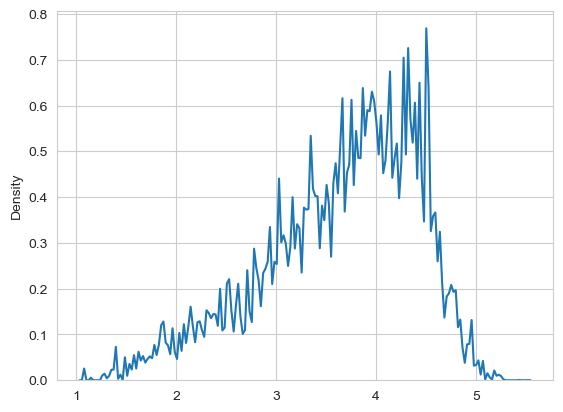

In [266]:
import seaborn as sns
sns.set_style('whitegrid')
sns.kdeplot(y_pred, bw_adjust=0.0256)

In [267]:
current_sum=0
residuals=[]
y_test_array=np.array(y_test)
for i in range(10000):
    residuals.append(y_pred[i]-y_test_array[i])
    current_sum+=(residuals[i])**2

rmse=(current_sum/10000)**0.5

In [268]:
rmse

1.3117486436531565

In [269]:
residuals[0:50]

[-0.9674587249755859,
 -0.13648772239685059,
 -0.4181098937988281,
 -0.9993503093719482,
 -0.4986238479614258,
 -0.7627339363098145,
 -0.46153926849365234,
 -0.08809471130371094,
 -1.1043939590454102,
 -1.7278361320495605,
 -1.4543485641479492,
 -1.8213112354278564,
 -1.5858657360076904,
 -1.2391679286956787,
 0.667457103729248,
 -0.4756593704223633,
 -0.030445575714111328,
 -0.7987675666809082,
 -0.7828450202941895,
 2.5820367336273193,
 -0.48062896728515625,
 -0.3604607582092285,
 -0.8935236930847168,
 -1.2477116584777832,
 -0.6983847618103027,
 -1.3577618598937988,
 -0.8218846321105957,
 -2.7262251377105713,
 -0.8672795295715332,
 -2.1771061420440674,
 1.689953088760376,
 -0.4969615936279297,
 -0.9158821105957031,
 3.055565357208252,
 1.174903392791748,
 -1.3866584300994873,
 -1.0765514373779297,
 -1.82283353805542,
 -2.563045024871826,
 -1.6853423118591309,
 -1.255239725112915,
 -0.9316306114196777,
 -2.0019521713256836,
 -0.6552891731262207,
 1.0797433853149414,
 -2.31341481208801

In [270]:
y_test_array[0:50]

array([5., 4., 5., 4., 5., 5., 5., 5., 5., 5., 5., 4., 5., 5., 4., 5., 3.,
       5., 5., 1., 5., 4., 5., 5., 5., 5., 5., 5., 5., 5., 2., 4., 5., 1.,
       3., 5., 5., 5., 5., 5., 5., 5., 5., 4., 3., 5., 2., 5., 4., 2.])

In [271]:
yBi=all_topics_pandasBi.iloc[:,15]
XBi=all_topics_pandasBi.iloc[:,0:15]

In [272]:
X_trainBi, X_testBi, y_trainBi, y_testBi = train_test_split(XBi, yBi, random_state=0, train_size = .8)

In [273]:
y_trainBi=pd.DataFrame(y_trainBi, columns=['score'])

In [274]:
regression_modelBi = XGBRegressor( 
    max_depth = 9, 
    min_child_weight = 1, 
    gamma = 0.4, 
    subsample=0.9, 
    colsample_bytree = 0.9,
    learning_rate =0.2,
    n_estimators=300)

In [275]:
regression_modelBi.fit(X_trainBi, y_trainBi,sample_weight=classes_weights, verbose=True)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.4, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [276]:
y_predBi = regression_modelBi.predict(X_testBi)

<AxesSubplot:ylabel='Density'>

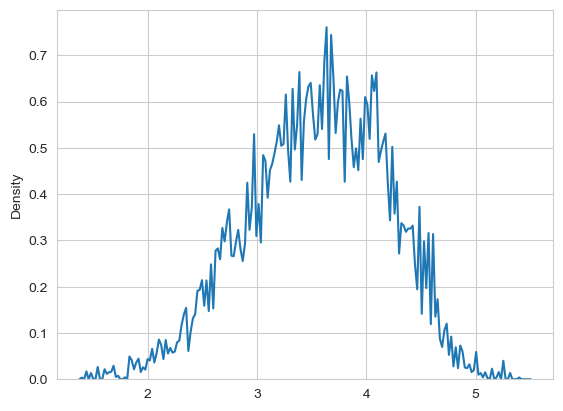

In [277]:
import seaborn as sns
sns.set_style('whitegrid')
sns.kdeplot(y_predBi, bw_adjust=0.0256)

In [280]:
current_sumBi=0
residualsBi=[]
y_test_arrayBi=np.array(y_testBi)
for i in range(10000):
    residualsBi.append(y_predBi[i]-y_test_arrayBi[i])
    current_sumBi+=(residualsBi[i])**2

rmseBi=(current_sumBi/10000)**0.5

In [282]:
rmseBi

1.430100531317764

In [307]:
yBiReplace=all_topics_pandasBiReplace.iloc[:,15]
XBiReplace=all_topics_pandasBiReplace.iloc[:,0:15]

In [308]:
X_trainBiReplace, X_testBiReplace, y_trainBiReplace, y_testBiReplace = train_test_split(XBiReplace, yBiReplace, random_state=0, train_size = .8)

In [309]:
y_trainBiReplace=pd.DataFrame(y_trainBiReplace, columns=['score'])

In [310]:
regression_modelBiReplace = XGBRegressor( 
    max_depth = 9, 
    min_child_weight = 1, 
    gamma = 0.4, 
    subsample=0.9, 
    colsample_bytree = 0.9,
    learning_rate =0.2,
    n_estimators=300)

In [311]:
regression_modelBiReplace.fit(X_trainBiReplace, y_trainBiReplace,sample_weight=classes_weights, verbose=True)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.4, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [312]:
y_predBiReplace = regression_modelBiReplace.predict(X_testBiReplace)

<AxesSubplot:ylabel='Density'>

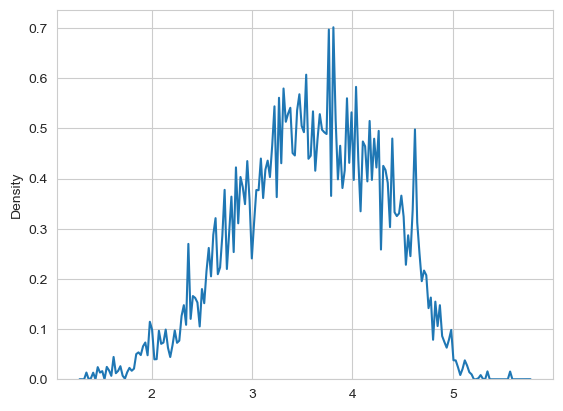

In [313]:
import seaborn as sns
sns.set_style('whitegrid')
sns.kdeplot(y_predBiReplace, bw_adjust=0.0256)

In [314]:
current_sumBiReplace=0
residualsBiReplace=[]
y_test_arrayBiReplace=np.array(y_testBiReplace)
for i in range(10000):
    residualsBiReplace.append(y_predBiReplace[i]-y_test_arrayBiReplace[i])
    current_sumBiReplace+=(residualsBiReplace[i])**2

rmseBiReplace=(current_sumBiReplace/10000)**0.5

In [315]:
rmseBiReplace

1.3867623916966803